# OLA 1: Data Wrangling

Link to the dataset used in this notebook: https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction

Please install and add to a folder called data from root directoy. Exclude in .gitignore please

In [6]:
!pip3 install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [7]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Task 1: Data Exploration & Cleaning

In [8]:
df = pd.read_csv('../data/data.csv')

In [9]:
print(df.describe())


              age         sex          cp     oldpeak  num       
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.826531    0.724490    2.982993    0.586054    0.360544
std      7.811812    0.447533    0.965117    0.908648    0.480977
min     28.000000    0.000000    1.000000    0.000000    0.000000
25%     42.000000    0.000000    2.000000    0.000000    0.000000
50%     49.000000    1.000000    3.000000    0.000000    0.000000
75%     54.000000    1.000000    4.000000    1.000000    1.000000
max     66.000000    1.000000    4.000000    5.000000    1.000000


The .describe() method provides summary stats as shown for the columns.

For example here, the 'age' column shows a mean age of approximately 47.8 years, with ia mnimnd um of 28 aa maximum of 66. This indicates that the dataset is relatively balanced in terms of age and gives us a good idea that we are wroking a decent set of data really

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB
None


Then, the .info() method reveals that the dataset contains 294 entries with a total count of 14 columns.

Columns like 'age', 'sex', 'cp', and 'num' are of integer type, while others like 'trestbps', 'chol', and 'thal' are objects due to the presence of '?' (don't worry I'm going to clean this up in a little bit in my next section where I clean the data)

In [11]:
print(df.head())

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  


Finally, the .head() method shows the first five rows of the dataset.

Again, we can see that some columns contain '?' as placeholders for missing values, which need to be replaced with NaN for proper analysis so let's get to it.

#### Overall observations
We can see from the info() and head() function that there use not-null contraints across each column but I can see that this does NOT mean we don't have missing values. They seem to actaully use '?' instead of using null which in all honesty is a bit strange to me but, but we will deal with it now as mentioned a couple times already.

### Data Cleaning

Always good practice to first see all the missing and null values and their columns:

In [18]:
missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

print("And their respective data types: \n", df.dtypes)

Columns with missing values:
 trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
slope       190
ca          291
thal        266
dtype: int64
And their respective data types: 
 age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
slope          object
ca             object
thal           object
num             int64
dtype: object


In [20]:
df = df.replace("?", np.nan)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


So what I did here is to convert every single '?' values with NaN regardless of their shown type being object. 

I feel safe to do that because I know those values are really measuring numerical values. For example even age and sex are represented through binary values and things on slope, ca, and thal are numerical values.

Voila, much better and all we did was replace every '?' value throughout our dataset with NaN with pandas .replace() method. 

In [23]:
threshold = len(df) * 0.5 # I do 0.5 for 50% 

df = df.dropna(thresh=threshold, axis=1)

print(df.head())
print(df.info())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   num         
0           0  
1           0  
2           0  
3           0  
4           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293

Just quickly dropped columns that are missing more than 50% of their values.

#### Outliers

Alright, last step to clean the data, we need to identify and remove outliers. I plan to identify the outliers by bascially taking the 25th percentil and the 75th percentile and finding values that are more than 1.5 times the IQR.

So when we basically look at a normal distribution, 25th percentile is the point where 25% of the data is below it and 75th percentile is the point where 75% of the data is below it.

Now you are probably thinking, why can we just apply or assume that our data is normally distributed? Super simple, in statistics when we take a sample size of 30 or more, the distribution of the mean will be normal regardless of the shape of the population distribution.

So we can basically apply this to our data and identify the outliers:








In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

df_cleaned = df[~outliers.any(axis=1)]

print(df_cleaned.head())
print(df_cleaned.info())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
5   32    0   2     105.0  198.0  0.0      0.0    165.0    0.0      0.0   
6   32    1   2     110.0  225.0  0.0      0.0    184.0    0.0      0.0   
7   32    1   2     125.0  254.0  0.0      0.0    155.0    0.0      0.0   

   num         
1           0  
2           0  
5           0  
6           0  
7           0  
<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 289
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         202 non-null    int64  
 1   sex         202 non-null    int64  
 2   cp          202 non-null    int64  
 3   trestbps    202 non-null    float64
 4   chol        182 non-null    float64
 5   fbs         198 non-null    float64
 6   restecg     201 non-

### Data Visualization

After our cleanup, we want to visualise the data. I'm picking a mix of matplotlib and seaborne as the tools for this job today.


In [ ]:
sns.set(style="whitegrid")

Set seaborne style first. Then we can start plotting:

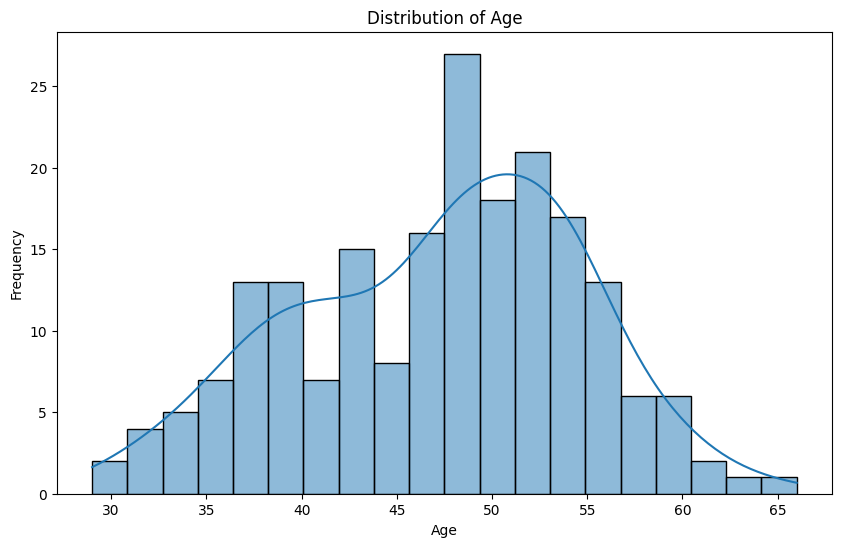

Text(0.5, 0, 'Age')

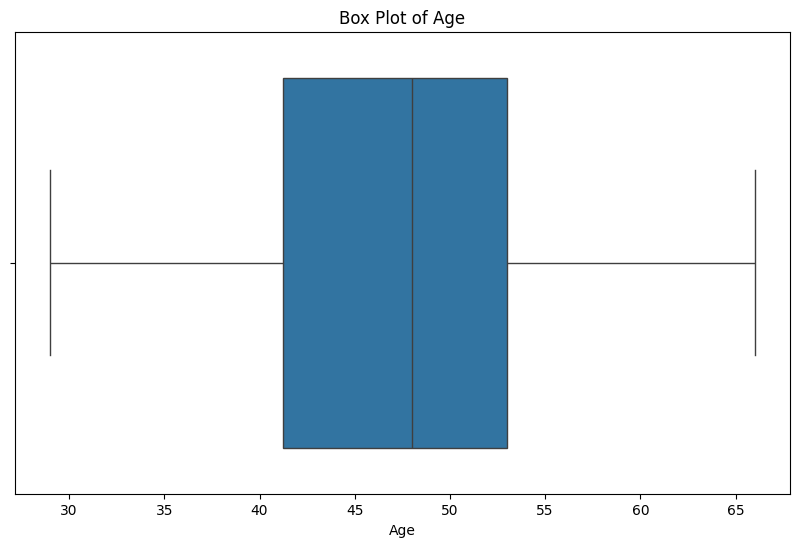

In [25]:
# Histogram on age vs frequency
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot on age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')

Now for some categorical values:

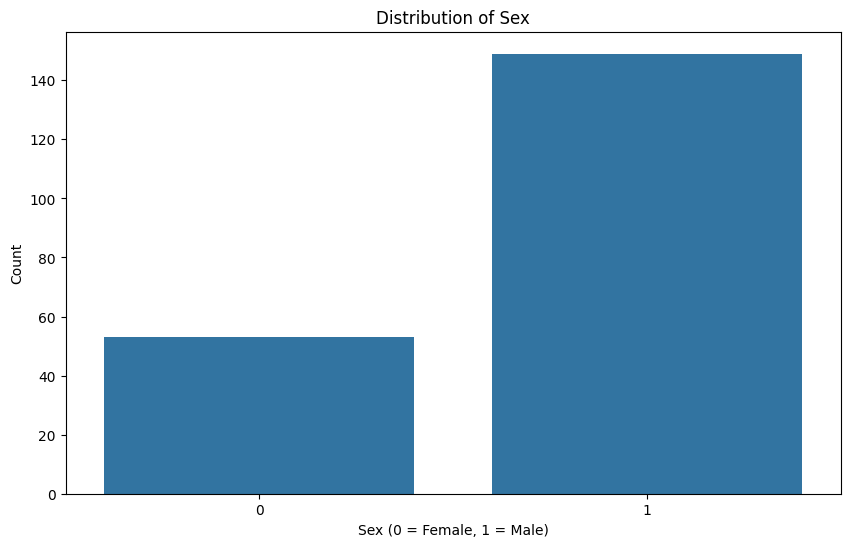

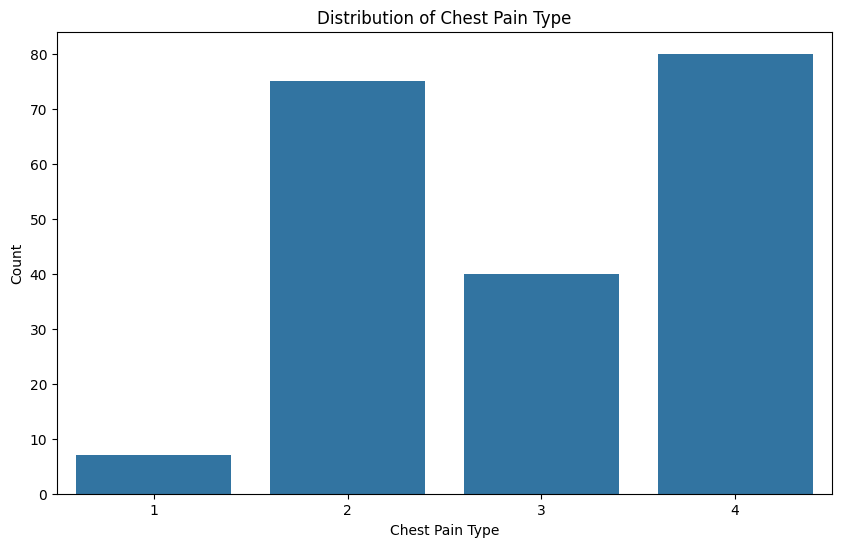

In [26]:
# Count plot for sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df_cleaned)
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

# Count plot for chest pain type
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', data=df_cleaned)
plt.title('Distribution of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

## Task 2: Feature Engineering and Descriptive Statistics

### Objective

Enhance the dataset with new features and then use descriptive statistics
to explain the distribution of the data.

### Feature Engineering

Let's start by binning the age column into three categories: Young, Middle-aged, and Senior:

In [27]:
bins = [0, 35, 50, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels)

print(df_cleaned[['age', 'age_group']].head())

   age age_group
1   29     Young
2   29     Young
5   32     Young
6   32     Young
7   32     Young


/var/folders/sr/60t35rxs16b5bhc31mv2ctvr0000gn/T/ipykernel_32300/2736389421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels)


Now I want to put a hot encoding on the cp column since we have like 1, 2, 3, 4 and all we do is split them into seperate colums so we can put true or false for each row. By the way: cp in our dataset stands for chestpain. When we say hot encoding too, we are basically just converting the categorical values into binary values which I can represent as booleans.

In [28]:
df_encoded = pd.get_dummies(df_cleaned, columns=['cp'], prefix='cp')

print(df_encoded.head())

   age  sex  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1   29    1     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   29    1     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
5   32    0     105.0  198.0  0.0      0.0    165.0    0.0      0.0   
6   32    1     110.0  225.0  0.0      0.0    184.0    0.0      0.0   
7   32    1     125.0  254.0  0.0      0.0    155.0    0.0      0.0   

   num        age_group   cp_1  cp_2   cp_3   cp_4  
1           0     Young  False  True  False  False  
2           0     Young  False  True  False  False  
5           0     Young  False  True  False  False  
6           0     Young  False  True  False  False  
7           0     Young  False  True  False  False  


### Descriptive Statistics